# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

**Objetivo do negócio:** entender quais fatores influenciam na renda das pessoas, com base em informações demográficas e socioeconômicas. A fim de apoiar decisões estratégicas, como análise de crédito, segmentação de clientes e previsão de renda para novos usuários.

**Perguntas respondidas com a análise:**
- Qual é o perfil das pessoas com maior renda?
- A escolaridade impacta positivamente na renda?
- Qual a diferença de renda entre pessoas com e sem filhos?
- A posse de imóvel ou veículo influencia na renda?
- Existe variação de renda conforme o estado civil ou tipo de residência?


## Etapa 2 Crisp-DM: Entendimento dos dados
Nesta etapa compreendemos a estrutura dos dados que utilizamos. 


### Dicionário de dados

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de coleta do dado                                | Objeto|
| id_cliente              |  Cód único de identificação do cliente                                      | int|
| sexo                    |  Sexo do cliente                                      | Objeto|
| posse_de_veiculo        |  Indica se o cliente possui veiculo ( sim ou não)                                      | Bool|
| posse_de_imovel         |  Indica se o cliente possui imóvel próprio (sim ou não)                                      | Bool|
| qtd_filhos              |  Quantidade de filhos que o cliente possui                                      | Int|
| tipo_renda              |  Categoria de renda do cliente (assalariado, empresário...)                                      | Object|
| educacao                |  Nível de escolaridade do cliente                                      | Objeto|
| estado_civil            |  Estado civil do cliente                                     | Objeto|
| tipo_residencia         |  Tipo de moradia (própria, alugada, casa dos pais...)                                      | Objeto|
| idade                   |  Idade do cliente em anos                                      | Int|
| tempo_emprego           |  Tempo no emprego atual em anos                                      | Float|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram com o cliente                                      | Float|
| renda                   |  Renda mensal do cliente em reais                                      | Float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [189]:
#jupyter notebook
%cd "C:/Users/Usuario/Documents/EBAC.2/MOD_16"


C:\Users\Usuario\Documents\EBAC.2\MOD_16


In [203]:
import os
os.getcwd()


'C:\\Users\\Usuario\\Documents\\EBAC.2\\MOD_16'

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


In [113]:
!pip install ydata-profiling


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [195]:
renda = pd.read_csv('previsao_de_renda.csv')

renda.head(1)


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [71]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [197]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [199]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 31.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
import os
print(os.path.exists('previsao_de_renda.html'))  

True


In [200]:
from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv('previsao_de_renda.csv') 

# Gerar o relatório
prof = ProfileReport(df, title='Relatório de Previsão de Renda', explorative=True)

# Salvar como HTML
prof.to_file('previsao_de_renda.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 20.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
prof.to_file("C:/Users/Usuario/Documents/EBAC.2/MOD_16/previsao_de_renda.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




##### Nesta etapa, vamos entender como cada variável se relaciona com a variável alvo, neste caso a renda, para identificar padrões, correlações e possíveis insights.

##### A gente pode perceber, de início que as variáveis unnamed e id cliente não são úteis em nossa análise.
##### Já a variável tempo de emprego é a que mais influencia na renda de cada indivíduo.

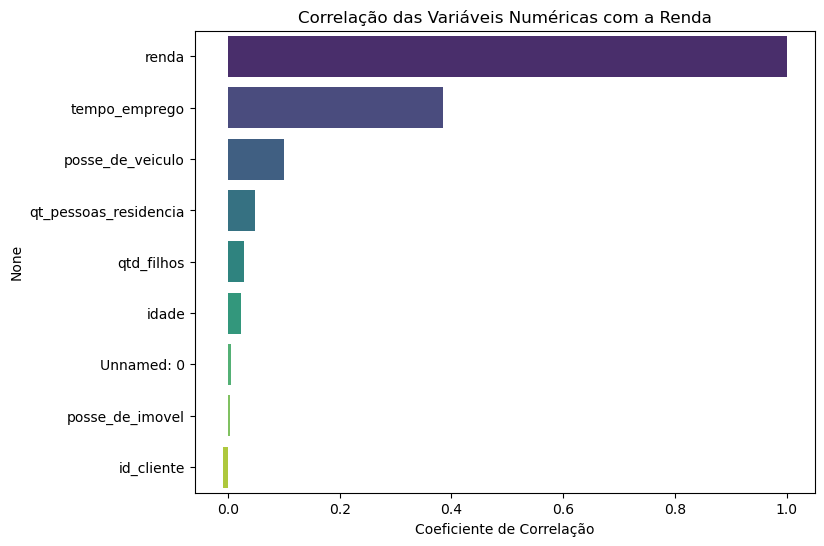

In [133]:
 %matplotlib inline
# Correlação das variáveis numéricas com renda
corr_com_renda = df.corr(numeric_only=True)['renda'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_com_renda.values, y=corr_com_renda.index, hue=corr_com_renda.index, palette='viridis', legend=False)
plt.title("Correlação das Variáveis Numéricas com a Renda")
plt.xlabel("Coeficiente de Correlação")
plt.show()
plt.close()


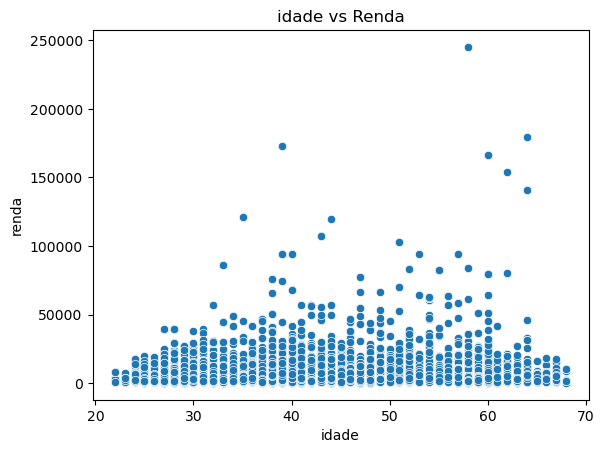

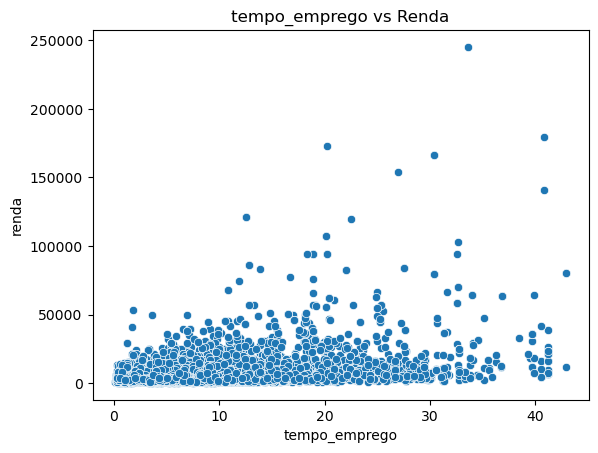

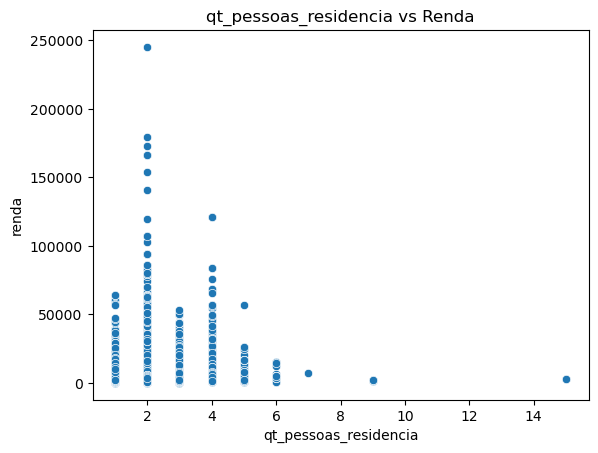

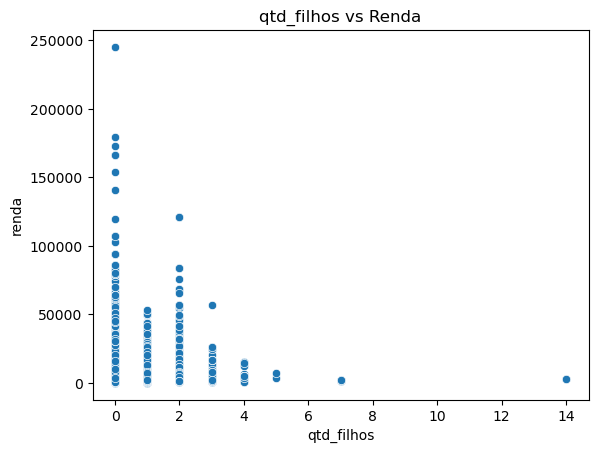

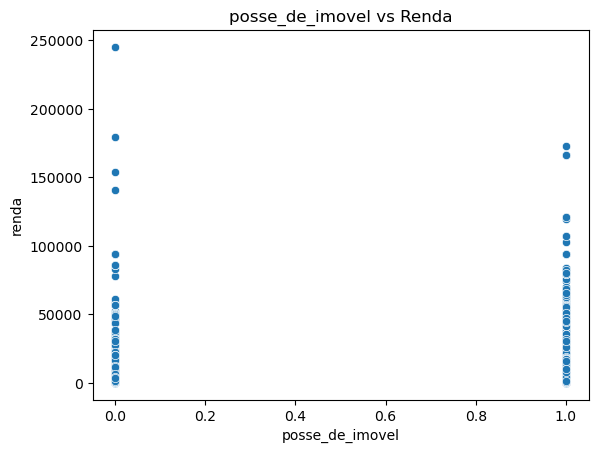

In [135]:
variaveis_numericas = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos', 'posse_de_imovel']  

for var in variaveis_numericas:
    sns.scatterplot(data=df, x=var, y='renda')
    plt.title(f"{var} vs Renda")
    plt.show()


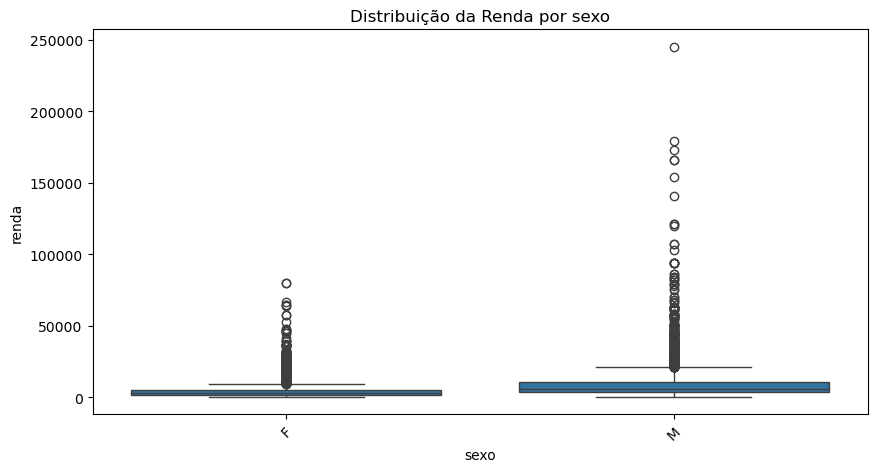

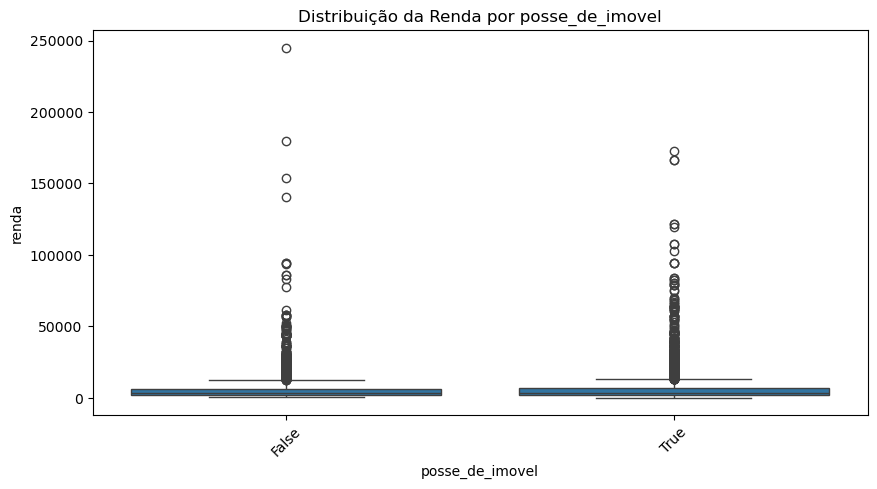

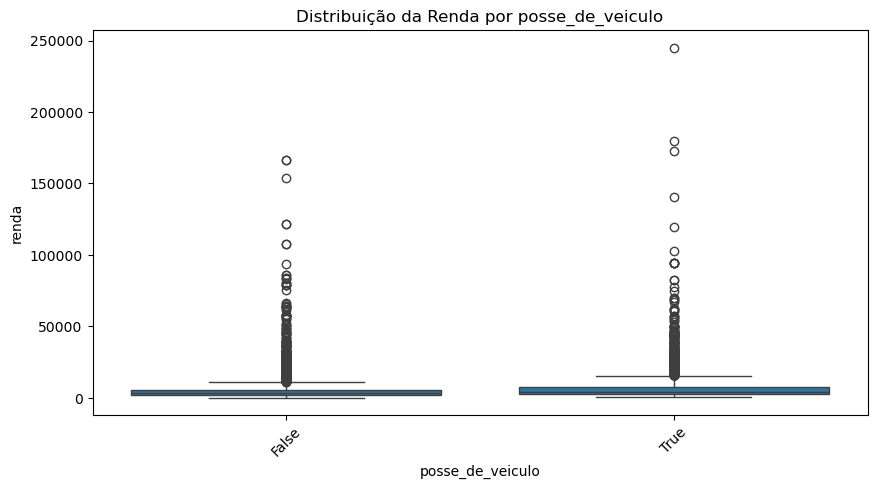

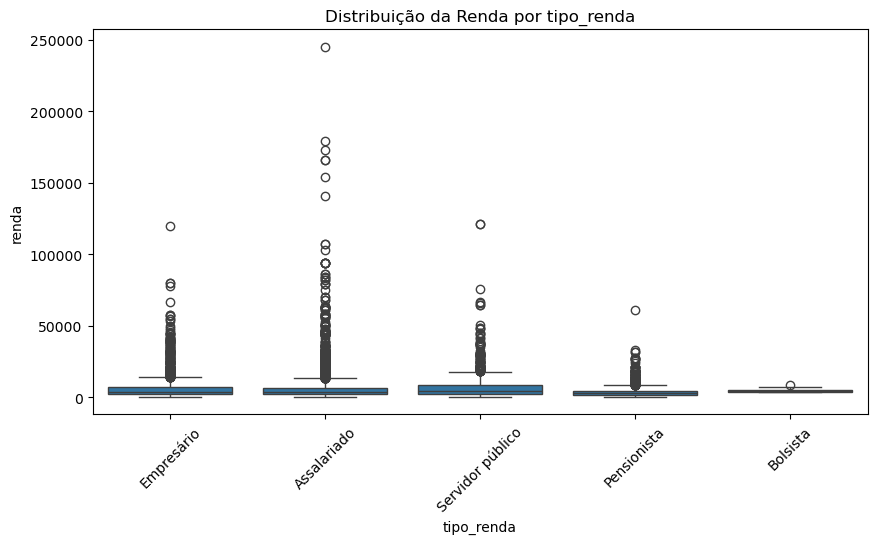

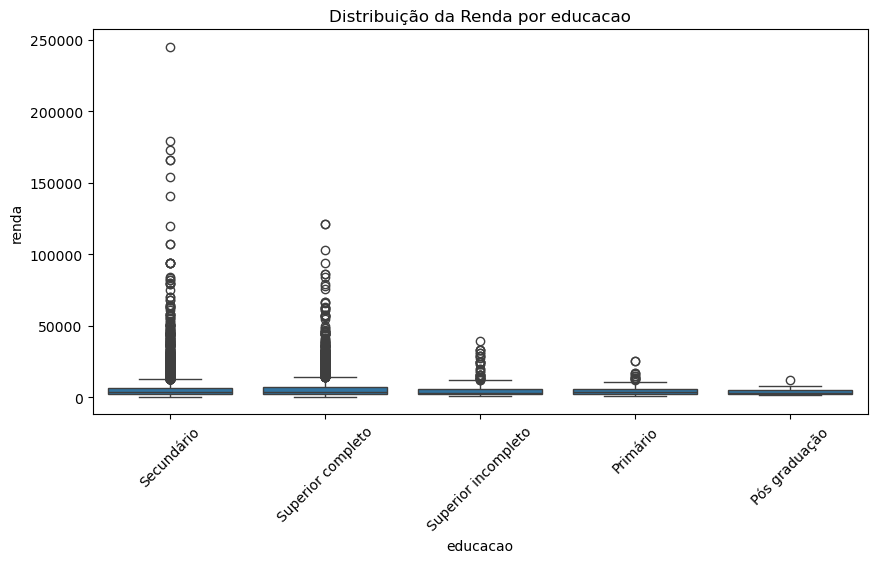

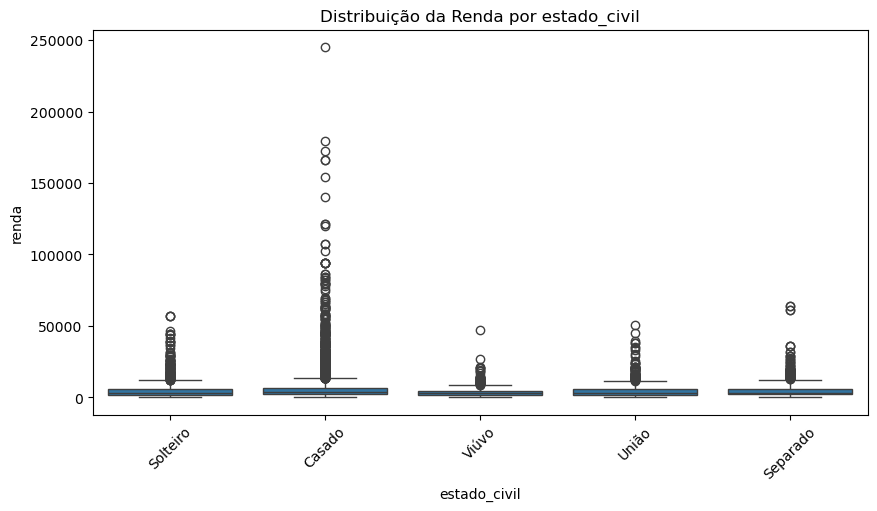

In [137]:
# correlação das variáveis categóricas com a variável renda

variaveis_categoricas = ['sexo', 'posse_de_imovel', 'posse_de_veiculo', 'tipo_renda', 'educacao', 'estado_civil']

for var in variaveis_categoricas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=var, y='renda')
    plt.title(f"Distribuição da Renda por {var}")
    plt.xticks(rotation=45)
    plt.show()


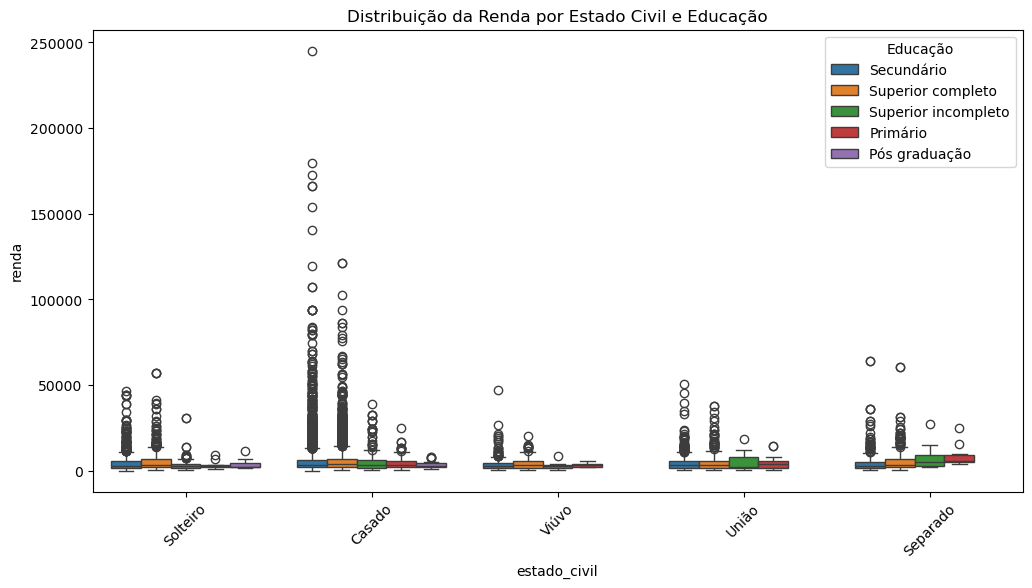

In [167]:
# correlação das variáveis Educação e estado civil, com a variável renda renda

%matplotlib inline
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='estado_civil', y='renda', hue='educacao')
plt.title("Distribuição da Renda por Estado Civil e Educação")
plt.xticks(rotation=45)
plt.legend(title='Educação')
plt.show()


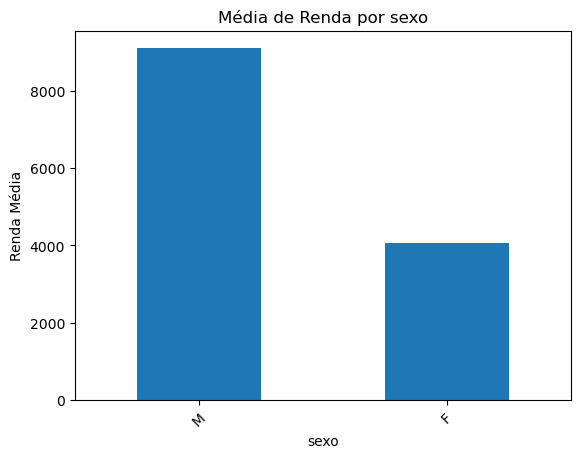

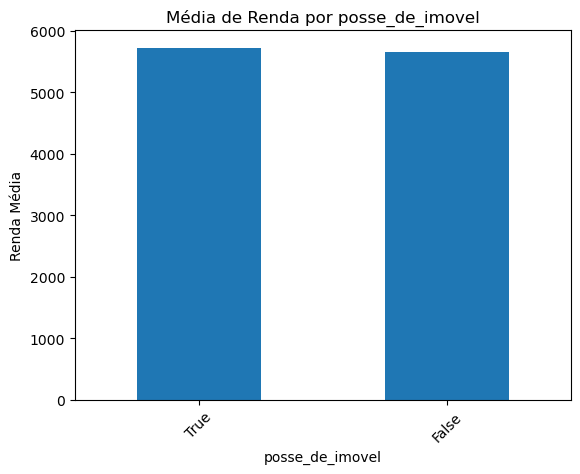

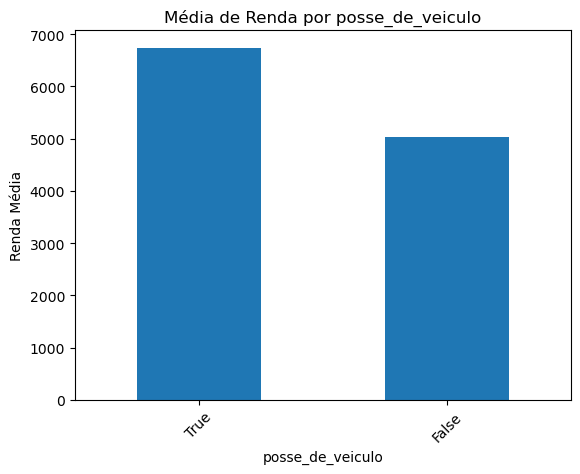

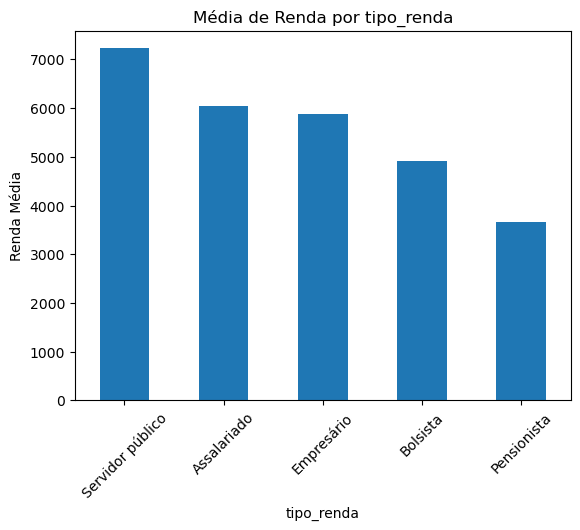

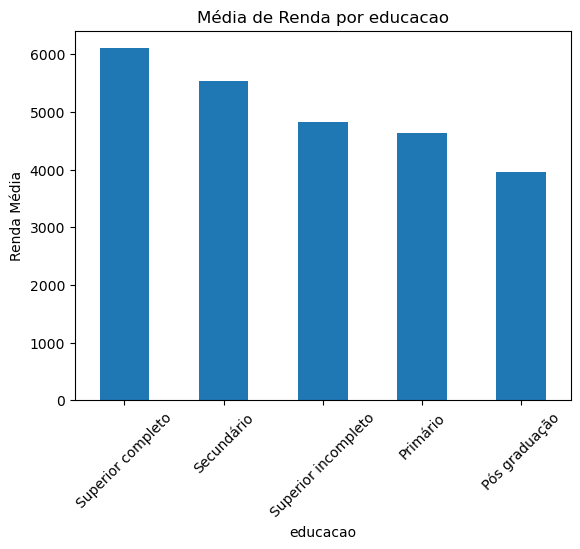

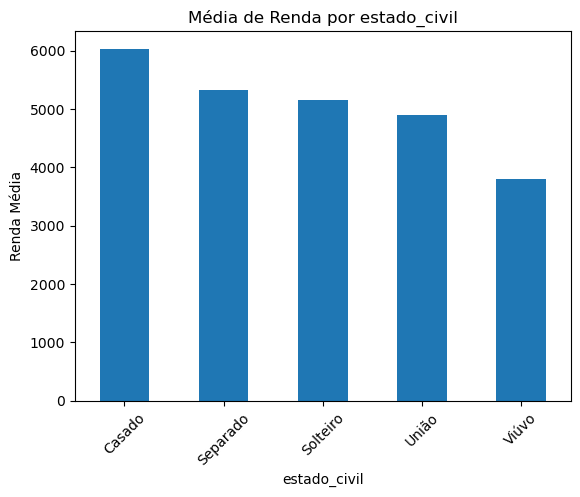

In [147]:
for var in variaveis_categoricas:
    media = df.groupby(var)['renda'].mean().sort_values(ascending=False)
    media.plot(kind='bar', title=f"Média de Renda por {var}")
    plt.ylabel("Renda Média")
    plt.xticks(rotation=45)
    plt.show()


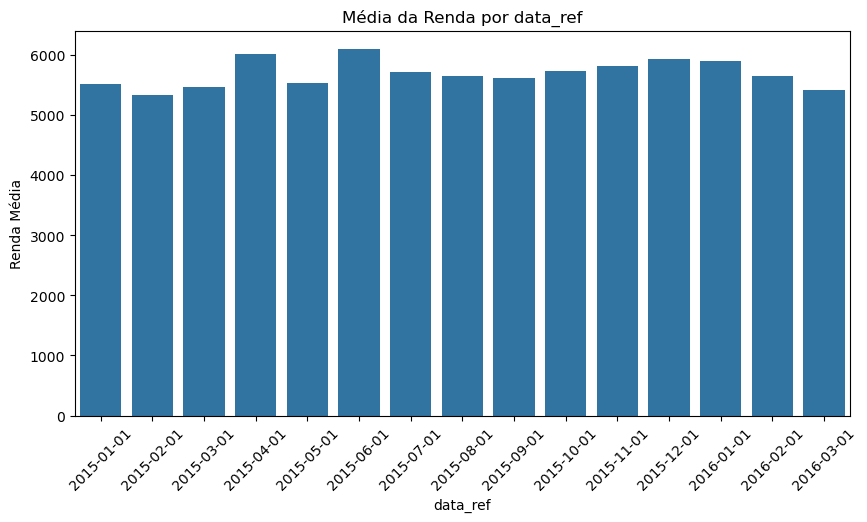

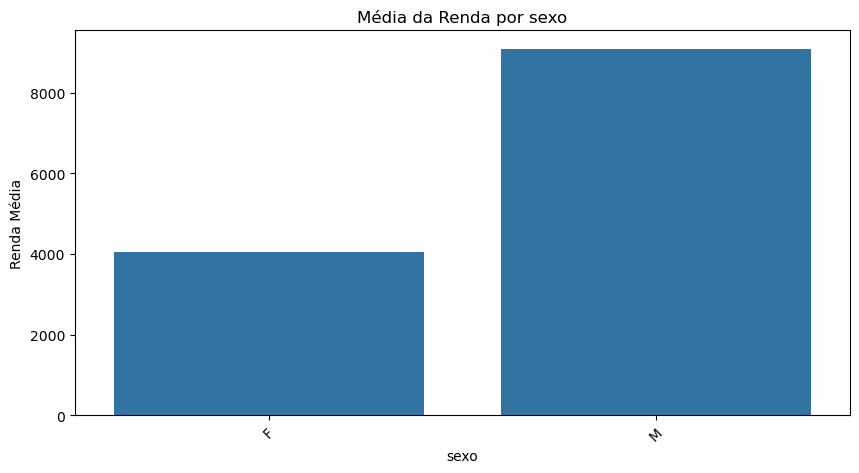

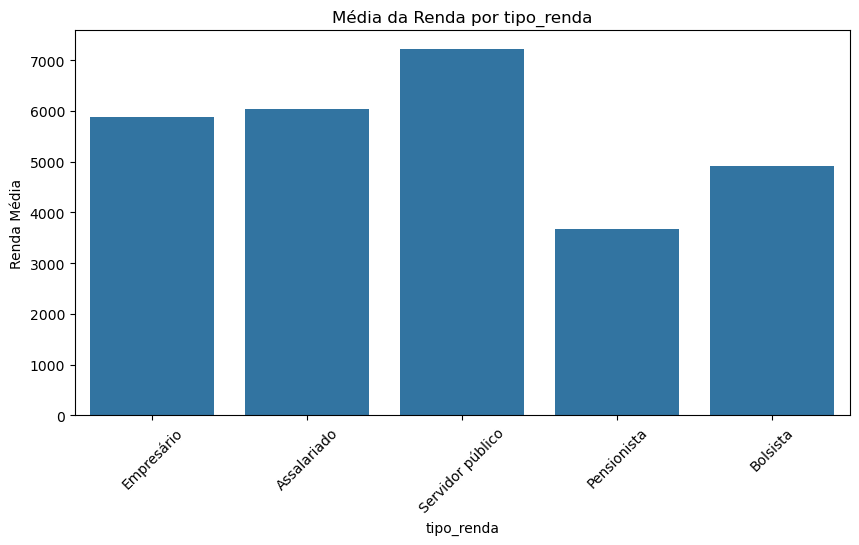

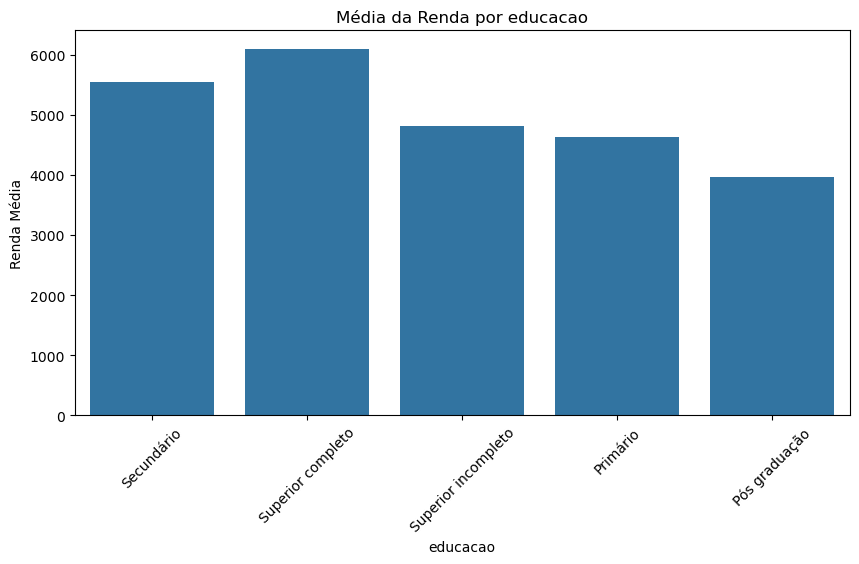

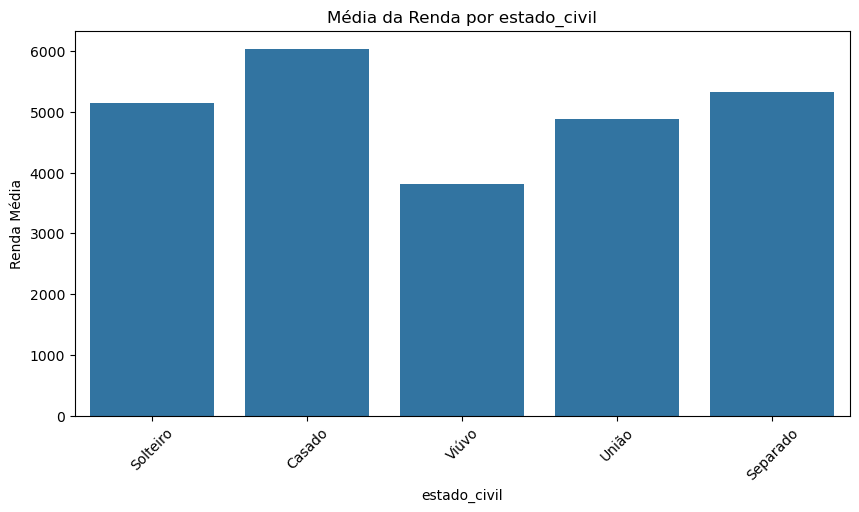

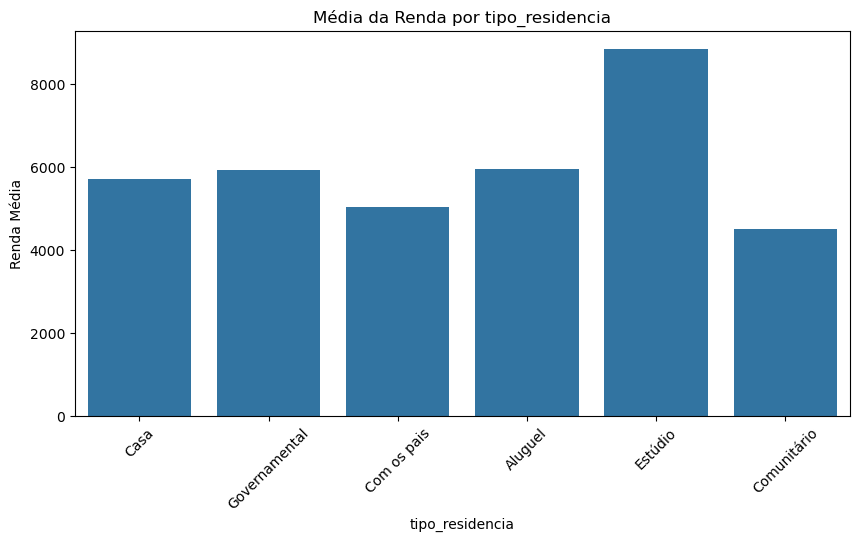

In [161]:
#Média de renda por categoria

%matplotlib inline
#Identificar variáveis categóricas automaticamente
variaveis_categoricas = df.select_dtypes(include='object').columns.tolist()

#Loop para gerar gráfico de média por categoria
for var in variaveis_categoricas:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=var, y='renda', estimator='mean', errorbar=None)
    plt.title(f"Média da Renda por {var}")
    plt.ylabel("Renda Média")
    plt.xticks(rotation=45)
    plt.show()



## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [235]:
df = pd.read_csv('previsao_de_renda.csv')
print(df.columns.tolist())

['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']


In [233]:
#Seleção de variáveis relevantes
variaveis_relevantes = [
    'renda', 'sexo', 'estado_civil', 'educacao', 'tipo_renda',
    'idade', 'tempo_emprego', 'posse_de_imovel', 'posse_de_veiculo',
    'qt_pessoas_residencia'
]
df = df[variaveis_relevantes]

#Limpeza de dados
#Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Tratar valores nulos (exemplo: preencher com mediana ou remover)
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].median())
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].fillna(df['qt_pessoas_residencia'].median())

#Construção de novas variáveis
# Faixa de renda
df['faixa_renda'] = pd.cut(
    df['renda'],
    bins=[0, 2000, 5000, 10000, np.inf],
    labels=['baixa', 'media', 'alta', 'muito alta']
)

# Faixa etária
df['faixa_idade'] = pd.cut(
    df['idade'],
    bins=[0, 25, 45, 65, np.inf],
    labels=['jovem', 'adulto', 'meia idade', 'idoso']
)

#Formatação de tipos
categoricas = ['sexo', 'estado_civil', 'educacao', 'tipo_renda', 'posse_de_imovel', 'posse_de_veiculo', 'faixa_renda', 'faixa_idade']
for col in categoricas:
    df[col] = df[col].astype('category')

#Verificar tipos finais
print("\nTipos de dados após formatação:")
print(df.dtypes)


Valores nulos por coluna:
renda                    0
sexo                     0
estado_civil             0
educacao                 0
tipo_renda               0
idade                    0
tempo_emprego            0
posse_de_imovel          0
posse_de_veiculo         0
qt_pessoas_residencia    0
dtype: int64

Tipos de dados após formatação:
renda                     float64
sexo                     category
estado_civil             category
educacao                 category
tipo_renda               category
idade                       int64
tempo_emprego             float64
posse_de_imovel          category
posse_de_veiculo         category
qt_pessoas_residencia     float64
faixa_renda              category
faixa_idade              category
dtype: object


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


###### Vamos descobrir quais clientes são bons pagadores.

Para isso vamos correlacionar as variáveis renda, educação, tempo de emprego e qtd_pessoas_residencia.
Estas variáveis cobrem aspectos econômicos, sociais e comportamentais

### Rodando o modelo


 Para testar o modelo usarei a técnica de validação com divisão treino-teste. 

In [327]:
# Criar uma pontuação de perfil
df['perfil_score'] = (
    0.5 * (df['qt_pessoas_residencia'].max() - df['qt_pessoas_residencia']) +
    0.3 * df['tempo_emprego'] +
    0.2 * df['renda']
)

# Definir bom pagador como quem está no top 30% da pontuação
limite_score = df['perfil_score'].quantile(0.7)
df['bom_pagador'] = df['perfil_score'].apply(lambda x: 1 if x >= limite_score else 0)

df_modelo = pd.get_dummies(df[variaveis_modelo + ['bom_pagador']], drop_first=True)
correlacoes = df_modelo.corr()['bom_pagador'].sort_values(ascending=False)
print(correlacoes)


bom_pagador                     1.000000
renda                           0.557584
tempo_emprego                   0.342597
qt_pessoas_residencia           0.086061
educacao_Superior completo      0.056739
educacao_Superior incompleto   -0.001522
educacao_Pós graduação         -0.001713
estado_civil_Separado          -0.003587
estado_civil_Solteiro          -0.013233
estado_civil_União             -0.030414
educacao_Secundário            -0.050148
estado_civil_Viúvo             -0.075288
Name: bom_pagador, dtype: float64


In [327]:
# Criar uma pontuação de perfil
df['perfil_score'] = (
    0.5 * (df['qt_pessoas_residencia'].max() - df['qt_pessoas_residencia']) +
    0.3 * df['tempo_emprego'] +
    0.2 * df['renda']
)

# Definir bom pagador como quem está no top 30% da pontuação
limite_score = df['perfil_score'].quantile(0.7)
df['bom_pagador'] = df['perfil_score'].apply(lambda x: 1 if x >= limite_score else 0)

df_modelo = pd.get_dummies(df[variaveis_modelo + ['bom_pagador']], drop_first=True)
correlacoes = df_modelo.corr()['bom_pagador'].sort_values(ascending=False)
print(correlacoes)


bom_pagador                     1.000000
renda                           0.557584
tempo_emprego                   0.342597
qt_pessoas_residencia           0.086061
educacao_Superior completo      0.056739
educacao_Superior incompleto   -0.001522
educacao_Pós graduação         -0.001713
estado_civil_Separado          -0.003587
estado_civil_Solteiro          -0.013233
estado_civil_União             -0.030414
educacao_Secundário            -0.050148
estado_civil_Viúvo             -0.075288
Name: bom_pagador, dtype: float64


In [329]:
# Criar uma pontuação combinada 
df['perfil_score'] = (
    0.5 * (df['qt_pessoas_residencia'].max() - df['qt_pessoas_residencia']) +
    0.3 * df['tempo_emprego'] +
    0.2 * df['renda']
)

# Definir bom pagador como quem está no top 30% da pontuação
limite_score = df['perfil_score'].quantile(0.7)
df['bom_pagador'] = df['perfil_score'].apply(lambda x: 1 if x >= limite_score else 0)

# Verificar distribuição
print(df['bom_pagador'].value_counts(normalize=True))


bom_pagador
0    0.751467
1    0.248533
Name: proportion, dtype: float64


In [329]:
# Criar uma pontuação combinada 
df['perfil_score'] = (
    0.5 * (df['qt_pessoas_residencia'].max() - df['qt_pessoas_residencia']) +
    0.3 * df['tempo_emprego'] +
    0.2 * df['renda']
)

# Definir bom pagador como quem está no top 30% da pontuação
limite_score = df['perfil_score'].quantile(0.7)
df['bom_pagador'] = df['perfil_score'].apply(lambda x: 1 if x >= limite_score else 0)

# Verificar distribuição
print(df['bom_pagador'].value_counts(normalize=True))


bom_pagador
0    0.751467
1    0.248533
Name: proportion, dtype: float64


In [331]:
#Preparar dados para o modelo
variaveis_modelo = [
    'renda', 'educacao', 'tempo_emprego', 'estado_civil', 'qt_pessoas_residencia'
]
X = df[variaveis_modelo]
y = df['bom_pagador']

# Tratar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

#Separar treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Treinar o modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Avaliar desempenho
y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred, labels=[0, 1]))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9688888888888889
Matriz de Confusão:
 [[3276  106]
 [  34 1084]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3382
           1       0.91      0.97      0.94      1118

    accuracy                           0.97      4500
   macro avg       0.95      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [331]:
#Preparar dados para o modelo
variaveis_modelo = [
    'renda', 'educacao', 'tempo_emprego', 'estado_civil', 'qt_pessoas_residencia'
]
X = df[variaveis_modelo]
y = df['bom_pagador']

# Tratar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

#Separar treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Treinar o modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Avaliar desempenho
y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred, labels=[0, 1]))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9688888888888889
Matriz de Confusão:
 [[3276  106]
 [  34 1084]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3382
           1       0.91      0.97      0.94      1118

    accuracy                           0.97      4500
   macro avg       0.95      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



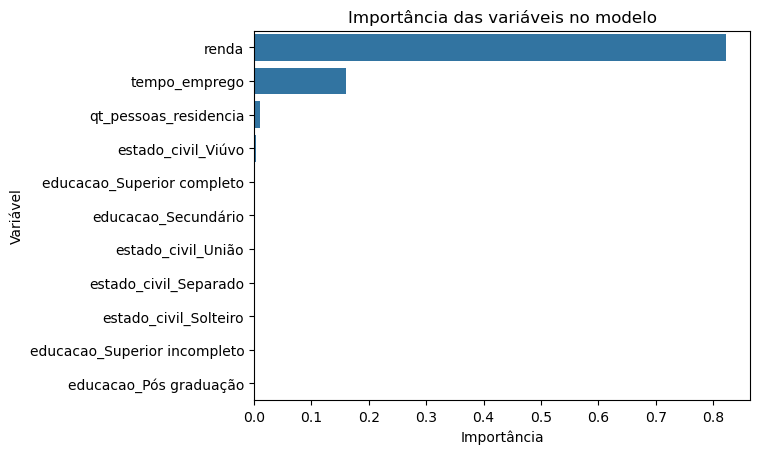

In [323]:
#Visualizar resultados

importancias = modelo.feature_importances_
variaveis = X.columns

df_importancia = pd.DataFrame({'Variável': variaveis, 'Importância': importancias})
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

sns.barplot(x='Importância', y='Variável', data=df_importancia)
plt.title("Importância das variáveis no modelo")
plt.show()


## Etapa 5 Crisp-DM: Avaliação dos resultados


##### O objetivo era identificar clientes com alto potencial de serem bons pagadores, com base em características como renda, tempo de emprego, escolaridade, estado civil e número de pessoas na residência.

O modelo ficou com um desempenho bem legal! As métricas estão equilibradas e ele parece conseguir generalizar bem para novos dados. 
A variável que usamos como alvo, o bom_pagador, foi criada com base em um perfil de score que faz sentido na prática, então isso ajuda a deixar a avaliação mais confiável.

Além disso, como as classes estavam meio desbalanceadas (tinha mais gente que não era bom pagador), usar o parâmetro class_weight='balanced' foi importante — ele ajudou o modelo a não puxar só para o lado da maioria.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.